<h1 style='color:#15284C; font-size:30px'><center>Project Thesis - First Internship</center></h1>

<h3 style='color:#15284C;'> Import Dependencies </h3>

In [1]:
#array ,linear algebra, fourier transform, and matrices.
import numpy as np
# merging, reshaping, selecting, as well as data cleaning, and data wrangling features.
import pandas as pd
#data visulization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
#importing databse
import sqlite3

#regular expression
import re
%matplotlib inline 

#natural language processing library
import nltk

#lemmatization
from nltk.stem import WordNetLemmatizer
#stemming
from nltk.stem import PorterStemmer
#word tokenization
from nltk import word_tokenize
#sentence tokenization
from nltk import sent_tokenize

#part of speect tagging
from nltk import pos_tag

#remove stop word in english
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#library to remove punctuation

#string
import string

#Sentiment Analysis 
from textblob import TextBlob

#emojiii
import emoji
#box plot in feedback analysis
import plotly.express as px

<h3 style='color:#15284C;'>Load Dataset</h3>

In [2]:
#read dataset
data = pd.read_csv('dataset/last_update_dataset.csv')

In [3]:
#set full display all features
pd.set_option('display.max_columns', None)
list(data.columns)

['Timestamp',
 'Username',
 'I agree',
 'Gender',
 'Age',
 'Phone Number / Tel',
 'Your Major ',
 'Education Levels',
 'University/Institution',
 'Your Current Locality When Studying Online Learning',
 'Feedback on online/distance learning (During COVID-19)',
 'Emotional of online/distance learning (During COVID-19)',
 'Telegram',
 'Email Address',
 'Messenger',
 'University Messenger',
 'Other Digital Communication Tools ',
 'Google Meet',
 'Zoom',
 'Microsoft Team',
 'Google Classroom',
 'Other Online Management Platforms',
 'I have highly attended school works.',
 'On average, How much time do you spend per day on online learning? ',
 'I prefer to study online more than the physical class',
 'I have been feeling stressed since I started studying online.',
 'During the online learning, I was received more confidence in solving personal problems.',
 'Communication with classmates and teachers during online learning',
 'I can ask the teacher for help quickly when I have a problem.',
 '

<h3 style='color:#15284C;'>Exploratory Data Analysis - EDA</h3>

In [4]:
#rename the columns
data.rename(columns={
    'Timestamp':'time_stamp',
    'Username':'user_name',
    'I agree':'terms_conditions',
    'Gender':'gender',
    'Age':'age',
    'Phone Number / Tel':'tel',
    'Your Major ':'major',
    'Education Levels':'education_levels',
    'University/Institution':'university',
    'Your Current Locality When Studying Online Learning':'local',
    'Feedback on online/distance learning (During COVID-19)':'feedback',
    'Emotional of online/distance learning (During COVID-19)':'emotion',
    'Telegram':'telegram',
    'Email Address':'email_address',
     'Messenger':'messenger',
     'University Messenger':'university_messenger',
     'Other Digital Communication Tools ':'other_com_tools',
     'Google Meet':'google_meet',
     'Zoom':'zoom',
     'Microsoft Team':'microsoft_team',
     'Google Classroom':'google_classroom',
     'Other Online Management Platforms':'other_manage_tools',
     'I have highly attended school works.':'school_works',
     'On average, How much time do you spend per day on online learning? ':'learning_time',
     'I prefer to study online more than the physical class':'online_physical_class',
     'I have been feeling stressed since I started studying online.':'feeling_stress',
     'During the online learning, I was received more confidence in solving personal problems.':'solving_problem',
     'Communication with classmates and teachers during online learning':'communication',
     'I can ask the teacher for help quickly when I have a problem.':'asking_teacher',
     'I get more difficulties during online learning':'get_difficulties',
     'I meet difficulties during online learning':'difficulties',
     'My daily online learning process is working smoothly':'online_learning_smoothly',
     'What are you mostly using digital devices with online learning?':'digital_devices',
     'On average, how much have you paid per month on wifi or hotspot?':'internet_payment',
     'I encountered/meet technical difficulties while studying online.':'met_tech_difficulties',
     'Online learning can completely replace hands-on classroom learning, even if COVID-19 status is terminated.':'online_replace_offline',
     'I prefer to study face-to-face class (offline class)':'prefer_face_to_face',
     'I prefer to study online class':'prefer_online_class',
     'I prefer to study online and offline class':'prefer_both'
    }, inplace=True)

In [5]:
#check the data types
data.dtypes

time_stamp                  object
user_name                   object
terms_conditions            object
gender                      object
age                         object
tel                         object
major                       object
education_levels            object
university                  object
local                       object
feedback                    object
emotion                     object
telegram                     int64
email_address                int64
messenger                    int64
university_messenger         int64
other_com_tools             object
google_meet                  int64
zoom                         int64
microsoft_team               int64
google_classroom             int64
other_manage_tools          object
school_works                object
learning_time               object
online_physical_class       object
feeling_stress              object
solving_problem             object
communication               object
asking_teacher      

In [6]:
#check the features info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   time_stamp                503 non-null    object
 1   user_name                 503 non-null    object
 2   terms_conditions          503 non-null    object
 3   gender                    503 non-null    object
 4   age                       503 non-null    object
 5   tel                       460 non-null    object
 6   major                     503 non-null    object
 7   education_levels          503 non-null    object
 8   university                503 non-null    object
 9   local                     503 non-null    object
 10  feedback                  496 non-null    object
 11  emotion                   503 non-null    object
 12  telegram                  503 non-null    int64 
 13  email_address             503 non-null    int64 
 14  messenger                 

In [7]:
#check the dataset null or not
data.isnull().any()

time_stamp                  False
user_name                   False
terms_conditions            False
gender                      False
age                         False
tel                          True
major                       False
education_levels            False
university                  False
local                       False
feedback                     True
emotion                     False
telegram                    False
email_address               False
messenger                   False
university_messenger        False
other_com_tools              True
google_meet                 False
zoom                        False
microsoft_team              False
google_classroom            False
other_manage_tools           True
school_works                False
learning_time               False
online_physical_class       False
feeling_stress              False
solving_problem             False
communication               False
asking_teacher              False
get_difficulti

In [8]:
#sum the dataset is null 
data.isnull().sum()

time_stamp                    0
user_name                     0
terms_conditions              0
gender                        0
age                           0
tel                          43
major                         0
education_levels              0
university                    0
local                         0
feedback                      7
emotion                       0
telegram                      0
email_address                 0
messenger                     0
university_messenger          0
other_com_tools             262
google_meet                   0
zoom                          0
microsoft_team                0
google_classroom              0
other_manage_tools          366
school_works                  0
learning_time                 0
online_physical_class         0
feeling_stress                0
solving_problem               0
communication                 0
asking_teacher                0
get_difficulties              0
difficulties                  0
online_l

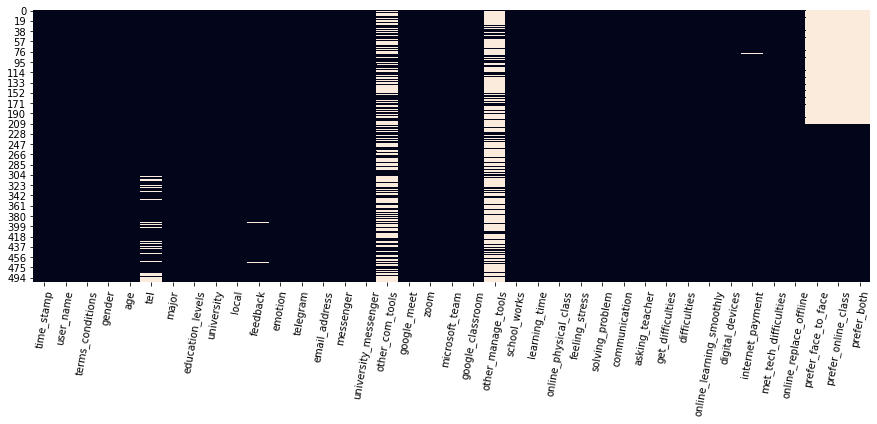

In [9]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False)
plt.xticks(rotation='80')
plt.show()

In [10]:
#check duplicates values number
def check_duplicate_values(data):
    print("**"*54)
    print("Duplicated values, there are: ", data.duplicated().sum())
    print("**"*54)
    
#check duplicates values
#call above function

check_duplicate_values(data)

************************************************************************************************************
Duplicated values, there are:  0
************************************************************************************************************


In [11]:
#drop the features are not mostly helpful
data.drop(['user_name','terms_conditions','tel','other_com_tools','other_manage_tools'],
         axis=1, inplace=True)

<h3 style='color:#15284C;'>EDA - Sentiment Analysis | Student Behaviors & Feedback Analysis</h3>

In [12]:
#define a variable and copy dataset
df_sent = data.copy()

In [13]:
# Loading dictionary of smilies
def load_dict_smileys():
 
 return {
 ":-)": "smiley",
 ":)" : "smiley",
 ":D": "smiley",
 "xD": "smiley",
 ":’)" : "smiley",
 ":’D" : "smiley",
 ":3" : "smiley",
 ":]" : "smiley",
 ":^)" : "smiley",
 ":-]" : "smiley",
 ":-3" : "smiley",
 ":->" : "smiley",
 ":))" : "smiley",
 "8-)" : "cool",
 "8)" : "cool",
 "8-D" : "cool",
 "B)" : "cool",
 "BD" : "cool",
 ":-}": "smiley",
 ":>" : "smiley",
 ":}" : "smiley",
 ":o)" : "smiley",
 ":c)" : "smiley",
 "=)" : "smiley",
 "=D" : "smiley",
 "=]" : "smiley",
 ":-D" : "smiley",
 "XD" : "smiley",
 ":o" : "surprised",
 ":O" : "surprised",
 "=o" : "surprised",
 "=O" : "surprised",
 ":0" : "surprised",
 ":(" : "sad",
 ":C" : "sad",
 ":c" : "sad",
 "=(" : "sad",
 "=c" : "sad",
 "=C" : "sad",
 ":-(" : "sad",
 ":-c" : "sad",
 ":-C" : "sad",
 ":-<" : "sad",
 ":<" : "sad",
 ":[" : "sad",
 ":{" : "sad",
 ":’(" : "crying",
 ":P" : "playful",
 ":p" : "playful",
 "xP" : "playful",
 "XP": "playful",
 "=P": "playful",
 "=p" : "playful",
 "xp": "playful",
 "xb": "playful",
 "❤": "love",
 "</3": "sad",
 ":/": "worried",
 ":-/" : "worried"
}

In [14]:
#create a function to convert text into lowercase
def convert_to_lowercase(text):
    text = text.str.lower()
    return text

cachedStopWords = stopwords.words("english")
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    return text


#create a function to apply word tokenization
def convert_to_word_tokens(text):
    text = text.word_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_sentence_tokens(text):
    text = text.sent_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_pos_tagging(text):
    text = text.pos_tag(text)
    return text

#calculate word length
def text_length_calculation(text):
    return len(text.split(' '))
    
#remove space
def remove_space(series):
    series.replace(" ", "", inplace=True)
    
            
#function to clean the word of any html-tags
def remove_html(sentence): 
    clean = re.compile('<.*?>')
    clean_text = re.sub(clean, ' ', sentence)
    return clean_text

#remove url from text
def remove_urls(text):
    url_pattern = re.compile(r'href|http.\w+')
    return url_pattern.sub(r'', text)

def remove_abbreviations(text):
    tokens = text.split(" ")
    j = 0
    for token in tokens:
        file_name = "<path to CSV file>"
        with open(file_name, "r") as fh:
            reader = csv.reader(fh)
            for row in reader:
                if row[0] == token:
                    tokens[j] = row[1]
                    fh.close()
                    j = j + 1
    return "".join(tokens)

# Removing smilies and emojis
def remove_emoticons(text):
    smilies = load_dict_smileys()
    split_tweet = text.split(" ")
    for key,val in smilies.items():
        if key in text:
            new_tweet = text.replace(key, val)
            text = new_tweet
            text = emoji.demojize(text)
            text = ' '.join(text.split())
    return text

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [15]:
#create a function to remove punctuation
def remove_punctuation(text):
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub('[%s]' % re.escape(string.punctuation),'', str(text))
    text = re.sub('\w*\d\w*', '', str(text))
    text = re.sub('[‘’“”…]', '', str(text))
    text = re.sub('\n', '', str(text))
    return text
remove_pun = lambda x: remove_punctuation(x)

In [16]:
#Converting the time frame and sorting in increasing order for easyness
df_sent["time_stamp"] = pd.to_datetime(df_sent["time_stamp"])
df_sent = df_sent.sort_values(by = "time_stamp")

In [17]:
#remove white space from series of the dataset
remove_space(df_sent.feedback)

In [18]:
#convert to lowercase
df_sent['feedback'] = convert_to_lowercase(df_sent.feedback)

In [19]:
#remove Punctuation

#********************************************************************************************************
#it spends much time to run
#********************************************************************************************************
df_sent['feedback'] = df_sent['feedback'].apply(lambda x: remove_punctuation(x))

In [20]:
#remove stopword
#It takes much time to run.
df_sent.feedback = df_sent.feedback.apply(remove_stopwords)

In [21]:
#remove smilies

#********************************************************************************************************
#it spends much time 
#********************************************************************************************************
df_sent['feedback'] = df_sent['feedback'].apply(lambda x: remove_emoticons(x))

In [22]:
#calculate review and summanry lengthd
df_sent['feedback_length']= df_sent['feedback'].apply(text_length_calculation)

In [23]:
# #language detection on dataset

# import spacy
# from spacy_langdetect import LanguageDetector
# import spacy.cli 
# spacy.cli.download("en_core_web_md")
# nlp = spacy.load("en_core_web_md")
# nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)
# text = df_sent.feedback
# doc = nlp(text)
# # document level language detection. Think of it like average language of document!
# print(doc._.language)
# # sentence level language detection
# for i, sent in enumerate(doc.sents):
#     print(sent, sent._.language)

In [24]:
# from textblob import TextBlob
#  def detect_lang(x):
#     lang = TextBlob(x)
#     lang.detect_language()
#     if lang == 'en':
#         return True
#     else:
#         return False
    
# df_sent.feedback = df_sent.feedback.apply(detect_lang)

In [25]:
# from spacy_langdetect import LanguageDetector
# from spacy.language import Language
# def create_language_detector(nlp, text):
#     return LanguageDetector()
# Language.factories("language_detector", func=create_language_detector)
# nlp=en_core_web_trf.load()
# nlp.add_pipe("language_detector",last=True)
# text = df_sent.feedback

In [26]:
# from spacy_langdetect import LanguageDetector
# def is_english_language(x):
#     try:
#         return ld.detect(x)=='en'
#     except:
#         return False

# df_sent = df_sent[df_sent['feedback'].apply(is_english_language)]

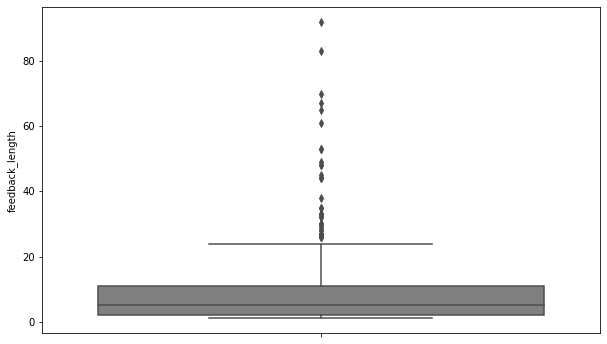

In [27]:
#check outlier of the text length
f, axes = plt.subplots(ncols=1, figsize=(10, 6))
sns.boxplot(y=df_sent['feedback_length'] ,color='grey')
plt.show()

In [28]:
#feature selecting
#select 2 features
df_sent = df_sent[['feedback', 'feedback_length', 'emotion', 'online_physical_class','feeling_stress',
                  'solving_problem','get_difficulties','met_tech_difficulties']]

In [29]:
df_sent.head()

feedback  feedback_length  \
0           good enough compare learning school safe                6   
1  everything good except internet stable cause s...               10   
2  pros cons cons seem exist pros subjects requir...               23   
3                      hard little bit simulator lab                5   
4                                               poor                1   

    emotion online_physical_class feeling_stress solving_problem  \
0   Sadness              Disagree          Agree        Disagree   
1  Surprise              Disagree          Agree           Agree   
2  Surprise              Disagree          Agree  Strongly Agree   
3   Sadness     Strongly Disagree          Agree           Agree   
4   Sadness                 Agree          Agree           Agree   

  get_difficulties met_tech_difficulties  
0         Disagree                 Agree  
1            Agree                 Agree  
2            Agree                 Agree  
3            Agree                 Agree  
4            Agree                 Agree

In [30]:
from collections import Counter

#add one more feature 
df_sent['temp_list'] = df_sent['feedback'].apply(lambda x:str(x).split())
#count the frequnce words
top = Counter([item for sublist in df_sent['temp_list'] for item in sublist])
#make it as dataframe
temp = pd.DataFrame(top.most_common(20))
#set the columns name
temp.columns = ['common_words','counts']
temp.style.background_gradient(cmap='Blues')

In [31]:
#plot the most common words in the feedback
#use plotly.express as px to plot it

fig = px.treemap(temp, path=['common_words'], values='counts',title='Tree of Most Common Words')
fig.show()

In [32]:
#we use textblob python library to calculate the palority values of text
#call sentitment_polarity
polarity=[]
for i in df_sent['feedback']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [33]:
#insert the polarity values as a column
df_sent['polarity'] = polarity 

In [34]:
#check the sentment values
#if the polarity > 0 : Positive
#else the polarity < 0 : Negative
positive_sent = df_sent[df_sent['polarity'] >= 0]
negative_sent = df_sent[df_sent['polarity'] < 0]

In [35]:
#define the label of sentiment
df_sent['sentiment'] = df_sent['polarity'].apply(lambda x : "Negative" if x < 0 else "Positive")

In [36]:
#check the values of sentiment
print("*" * 50)
print("Positive Sentiment: ", positive_sent.shape)
print("Negative Sentiment: ", negative_sent.shape)
print("*" * 50)

**************************************************
Positive Sentiment:  (357, 10)
Negative Sentiment:  (146, 10)
**************************************************


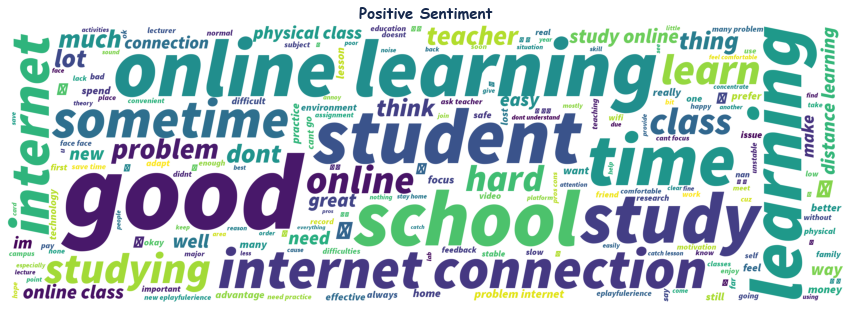

In [37]:
#using wordcloud to visualization the text of positive first
positive_text = (' '.join(positive_sent['feedback']))

plt.figure(figsize=(15, 8))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=3000, height=1000, 
                      font_path='font.ttf',
                      stopwords=stopwords,
                      background_color='white').generate(positive_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Positive Sentiment", fontweight='bold', color='#15284C', fontsize='15',fontname='Comic Sans MS')
plt.show()

In [38]:
positive_text[0:1000]

'good enough compare learning school safe everything good except internet stable cause sometime didnt catch lesson pros cons cons seem exist pros subjects require students eplayfulerience lesson inreallife assignment lab got study place feel comfortable improves confidence participating classes sometimes got annoy family internet connection unstable studying normal quite hectic didnt learn much sometimes take learning granted simple good problem faced network connection interrupted class effectiveness learning decreasing nothing study online easy study school internet smooth device use study also many problem like battery life short sometime error many thing online learning results classroom power learning materials spend time learning online learning seem effective students see student come rural area really hard connect internet joining class research studied rural area even city internet really slow lost connection times issue online learning internet connection none easy study home

In [39]:
#check the text length of postive sentiment
print("*" * 50)
print("Positive Text Length: ", len(positive_text), "Words")
print("*" * 50)

**************************************************
Positive Text Length:  21884 Words
**************************************************


In [40]:
#MosT common positive words
top = Counter([item for sublist in positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [41]:
#plot the positive words

fig = px.bar(temp_positive, x="count", y="common_words", title='Most Commmon Positive Words'
             , orientation='h', width=700, height=700,color='common_words')
fig.show()

In [42]:
#plot the positive words
fig = px.treemap(temp_positive, path=['common_words'], values='count',title='Tree Of Most Common Positive Words')
fig.show()

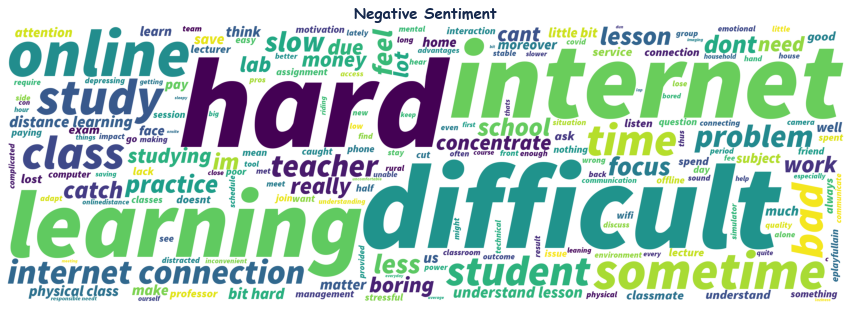

In [43]:
#using wordcloud to visualization the text of negative
negative_text = (' '.join(negative_sent['feedback']))

plt.figure(figsize=(15, 8))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=3000, height=1000, 
                      font_path='font.ttf',
                      stopwords=stopwords,
                      background_color='white').generate(negative_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Negative Sentiment", fontweight='bold', color='#15284C', fontsize='15', fontname='Comic Sans MS')
plt.show()

In [44]:
negative_text[0:300]

'hard little bit simulator lab poor sometime feel boring sometime feel good learning feel uncomfortable stressful bad hard sometimes due internet connection average bad little bit difficult studying classes hard learning sometimes low internet sleepy discuss group everyday laziness study front camera'

In [45]:
#check the text length of postive sentiment
print("*" * 50)
print("Negative Text Length: ", len(negative_text),"Words")
print("*" * 50)

**************************************************
Negative Text Length:  10555 Words
**************************************************


In [46]:
#Most common negative words
top = Counter([item for sublist in negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [47]:
#plot the positive words
fig = px.bar(temp_negative, x="count", y="common_words", title='Most Commmon Negative Words'
             , orientation='h', width=700, height=700,color='common_words')
fig.show()

In [48]:
#plot the negative words
fig = px.treemap(temp_negative, path=['common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

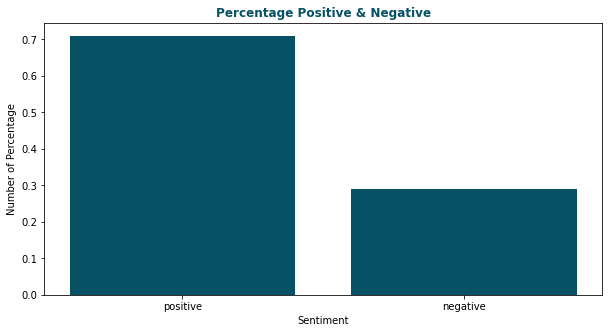

In [49]:
#plot the sentiment percentage 
pos_per = len(positive_sent)/len(df_sent)
neg_per = len(negative_sent)/len(df_sent)
plt.figure(figsize=(10,5))
plt.bar(['positive', 'negative'], [pos_per, neg_per],color='#065164')
plt.title('Percentage Positive & Negative', fontweight='bold', color='#065164')
plt.xlabel('Sentiment')
plt.ylabel('Number of Percentage')
plt.show()

<Figure size 720x720 with 0 Axes>

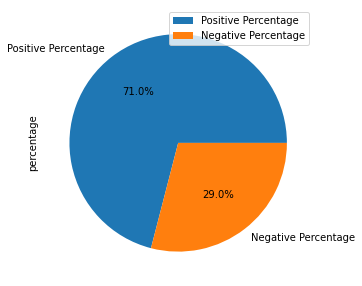

In [50]:
plt.figure(figsize=(10,10))
df = pd.DataFrame({'percentage': [pos_per, neg_per]},
                  index=['Positive Percentage', 'Negative Percentage'])
df.plot.pie(y='percentage',figsize=(10,5), autopct='%1.1f%%');
plt.legend(loc="best")
plt.show()

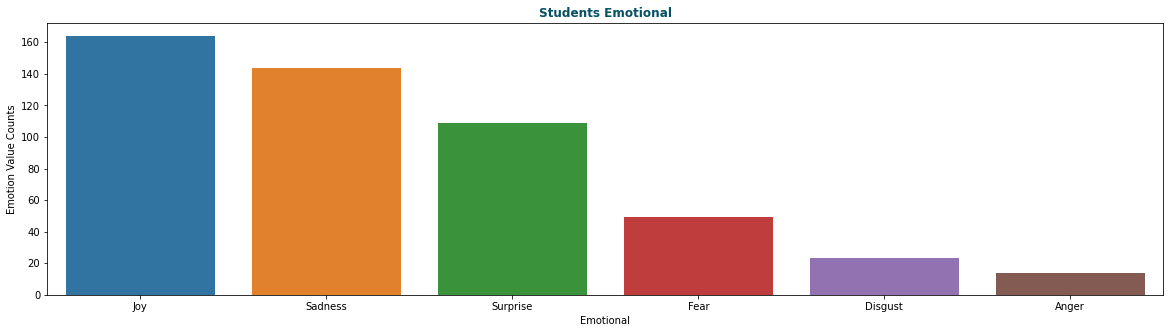

Joy         164
Sadness     144
Surprise    109
Fear         49
Disgust      23
Anger        14
Name: emotion, dtype: int64

In [83]:
plt.figure(figsize=(20,5))
sns.countplot(x='emotion', data=df_sent, order = df_sent['emotion'].value_counts().index)
plt.title('Students Emotional', fontweight='bold', color='#065164')
plt.xlabel("Emotional")
plt.ylabel('Emotion Value Counts')
#plt.xticks(rotation='45')
plt.show()
df_sent.emotion.value_counts()

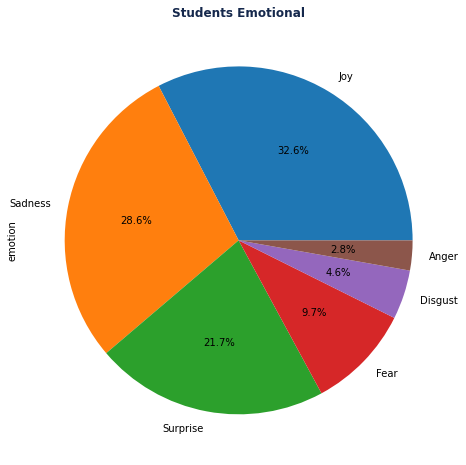

In [52]:
plt.figure(figsize=(8,8))
df_sent['emotion'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Students Emotional', fontweight='bold', color='#15284C')
plt.show()

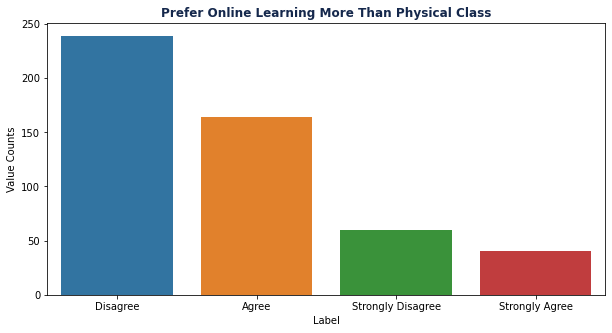

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='online_physical_class', data=df_sent,order = df_sent['online_physical_class'].value_counts().index)
plt.title('Prefer Online Learning More Than Physical Class', fontweight='bold', color='#15284C')
plt.xlabel("Label")
plt.ylabel('Value Counts')
#plt.xticks(rotation='45'a)
plt.show()

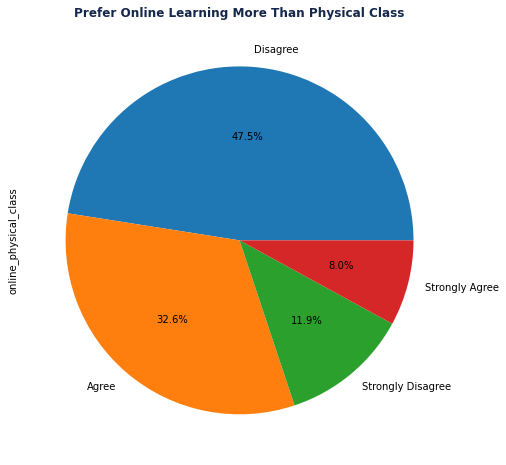

In [54]:
plt.figure(figsize=(8,8))
df_sent['online_physical_class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Prefer Online Learning More Than Physical Class', fontweight='bold', color='#15284C')
plt.show()

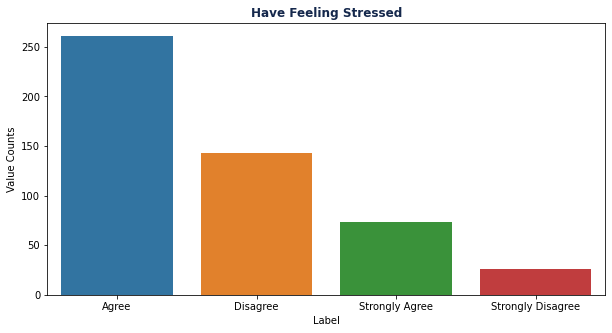

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x='feeling_stress', data=df_sent, order = df_sent['feeling_stress'].value_counts().index)
plt.title('Have Feeling Stressed', fontweight='bold', color='#15284C')
plt.xlabel("Label")
plt.ylabel('Value Counts')
#plt.xticks(rotation='45')
plt.show()

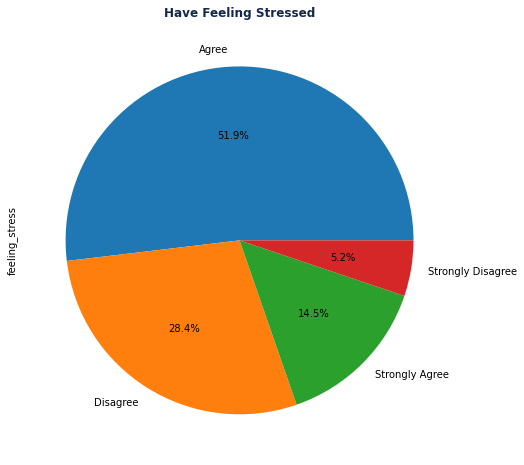

In [56]:
plt.figure(figsize=(8,8))
df_sent['feeling_stress'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Have Feeling Stressed', fontweight='bold', color='#15284C')
plt.show()

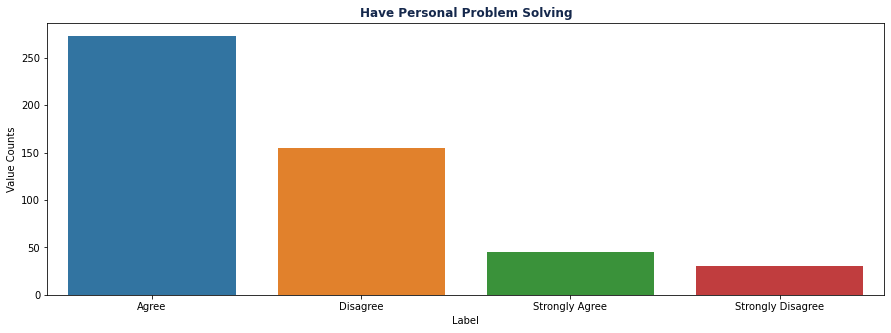

In [75]:
plt.figure(figsize=(15,5))
sns.countplot(x='solving_problem', data=df_sent, order = data['solving_problem'].value_counts().index)
plt.title('Have Personal Problem Solving', fontweight='bold', color='#15284C')
plt.xlabel("Label")
plt.ylabel('Value Counts')
#plt.xticks(rotation='45')
plt.show()

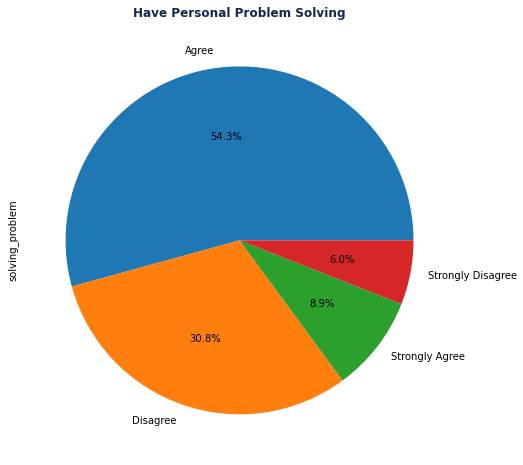

In [58]:
plt.figure(figsize=(8,8))
df_sent['solving_problem'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Have Personal Problem Solving', fontweight='bold', color='#15284C')
plt.show()

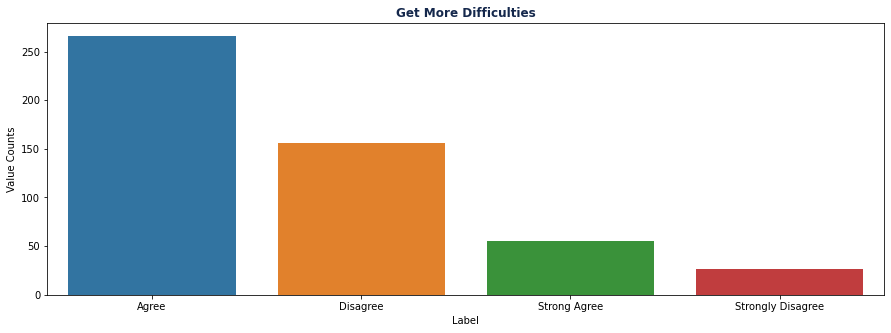

In [78]:
plt.figure(figsize=(15,5))
sns.countplot(x='get_difficulties', data=df_sent, order = data['get_difficulties'].value_counts().index)
plt.title('Get More Difficulties', fontweight='bold', color='#15284C')
plt.xlabel("Label")
plt.ylabel('Value Counts')
#plt.xticks(rotation='45')
plt.show()

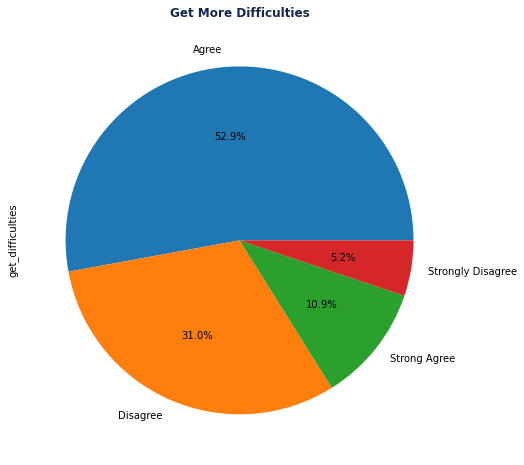

In [60]:
plt.figure(figsize=(8,8))
df_sent['get_difficulties'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Get More Difficulties', fontweight='bold', color='#15284C')
plt.show()

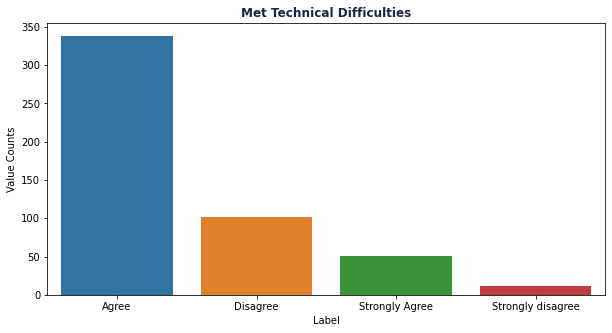

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x='met_tech_difficulties', data=df_sent, order = df_sent['met_tech_difficulties'].value_counts().index)
plt.title('Met Technical Difficulties', fontweight='bold', color='#15284C')
plt.xlabel("Label")
plt.ylabel('Value Counts')
#plt.xticks(rotation='45')
plt.show()

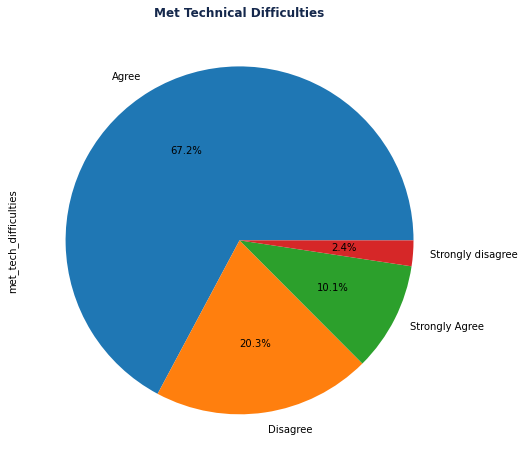

In [62]:
plt.figure(figsize=(8,8))
df_sent['met_tech_difficulties'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Met Technical Difficulties', fontweight='bold', color='#15284C')
plt.show()

<h3 style='color:#15284C;'>In-depth Sentiment Analysis</h3>

In [63]:
df_sent.head(2)

feedback  feedback_length  \
0           good enough compare learning school safe                6   
1  everything good except internet stable cause s...               10   

    emotion online_physical_class feeling_stress solving_problem  \
0   Sadness              Disagree          Agree        Disagree   
1  Surprise              Disagree          Agree           Agree   

  get_difficulties met_tech_difficulties  \
0         Disagree                 Agree   
1            Agree                 Agree   

                                           temp_list  polarity sentiment  
0    [good, enough, compare, learning, school, safe]       0.4  Positive  
1  [everything, good, except, internet, stable, c...       0.7  Positive

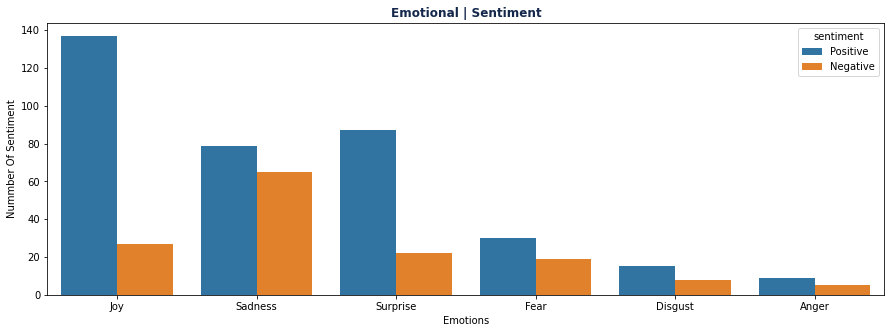

In [79]:
fig = plt.figure(figsize = (15,5))
sns.countplot(x='emotion', hue='sentiment', data=df_sent, order = df_sent['emotion'].value_counts().index)
plt.title('Emotional | Sentiment', fontweight='bold', color='#15284C')
plt.xlabel("Emotions")
plt.ylabel('Nummber Of Sentiment')
plt.xticks(rotation='0')
plt.show()

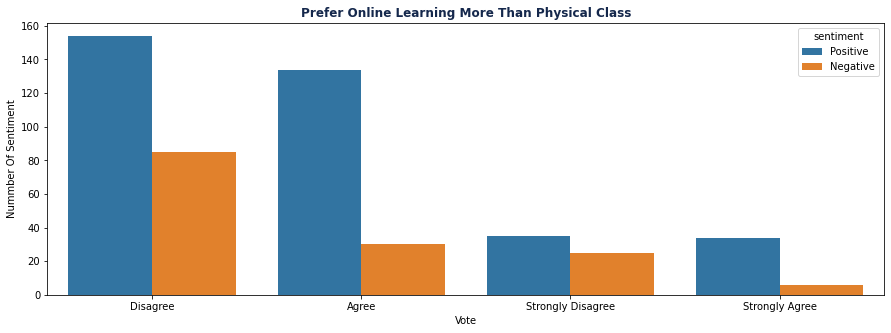

In [80]:
fig = plt.figure(figsize =(15,5))
sns.countplot(x='online_physical_class', hue='sentiment', data=df_sent, order = df_sent['online_physical_class'].value_counts().index)
plt.title('Prefer Online Learning More Than Physical Class', fontweight='bold', color='#15284C')
plt.xlabel("Vote")
plt.ylabel('Nummber Of Sentiment')
plt.xticks(rotation='0')
plt.show()

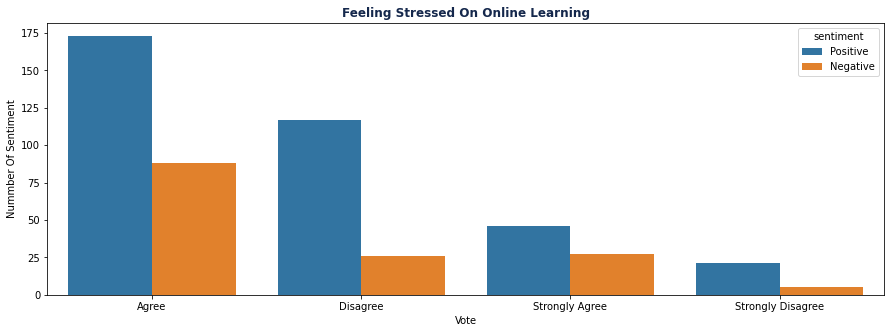

In [81]:
fig = plt.figure(figsize = (15,5))
sns.countplot(x='feeling_stress', hue='sentiment', data=df_sent, order = df_sent['feeling_stress'].value_counts().index)
plt.title('Feeling Stressed On Online Learning',fontweight='bold', color='#15284C')
plt.xlabel("Vote")
plt.ylabel('Nummber Of Sentiment')
plt.xticks(rotation='0')
plt.show()

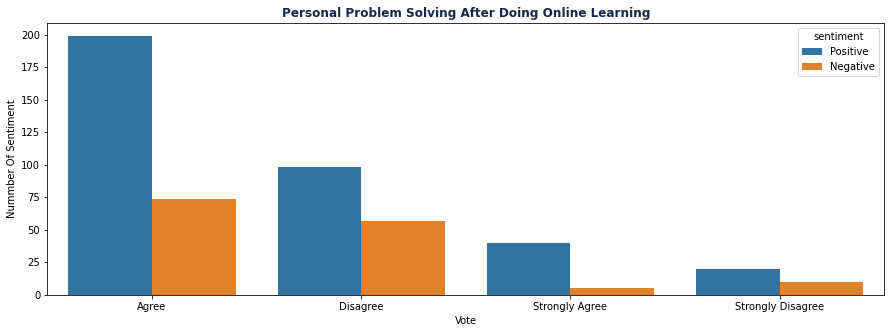

In [82]:
fig = plt.figure(figsize = (15,5))
sns.countplot(x='solving_problem', hue='sentiment', data=df_sent, order = df_sent['solving_problem'].value_counts().index)
plt.title('Personal Problem Solving After Doing Online Learning',fontweight='bold', color='#15284C')
plt.xlabel("Vote")
plt.ylabel('Nummber Of Sentiment')
plt.xticks(rotation='0')
plt.show()

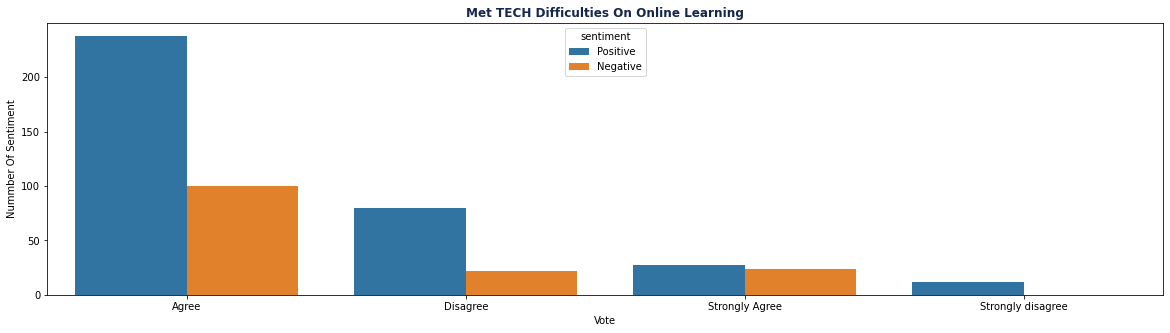

In [68]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x='met_tech_difficulties', hue='sentiment', data=df_sent,
             order = df_sent['met_tech_difficulties'].value_counts().index)
plt.title('Met TECH Difficulties On Online Learning', fontweight='bold', color='#15284C')
plt.xlabel("Vote")
plt.ylabel('Nummber Of Sentiment')
plt.xticks(rotation='0')
plt.show()

In [69]:
#define a variable to select who have Feeling Stress on online learning
#feeling_stressed = df_sent[df_sent['feeling_stress']=='Strongly Agree'] 
feeling_stressed = df_sent[df_sent['feeling_stress'].isin(['Disagree', 'Agree'])]

In [70]:
print("Number Of Dimension:", feeling_stressed.shape[1])
print("*" * 50)
print("Number Of Samples:", feeling_stressed.shape[0])

Number Of Dimension: 11
**************************************************
Number Of Samples: 404


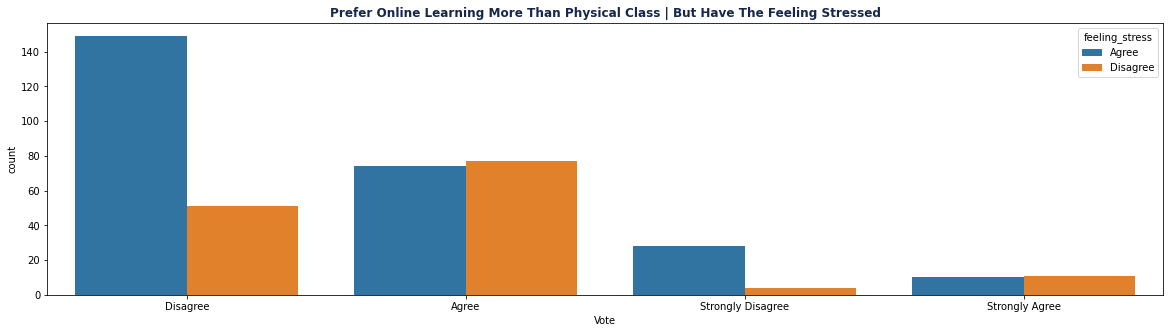

In [71]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x='online_physical_class', hue='feeling_stress',data=feeling_stressed, order = feeling_stressed['online_physical_class'].value_counts().index)
plt.title('Prefer Online Learning More Than Physical Class | But Have The Feeling Stressed', fontweight='bold', color='#15284C')
plt.xlabel("Vote")
#plt.ylabel('Nummber Of Sentiment')
plt.xticks(rotation='0')
plt.show()

In [72]:
#define a variable to select who have the difficulties on online learning
met_tech_difficulties = df_sent[df_sent['met_tech_difficulties'].isin(['Disagree', 'Agree'])]

In [73]:
print("Number Of Dimension:", met_tech_difficulties.shape[1])
print("*" * 50)
print("Number Of Samples:", met_tech_difficulties.shape[0])

Number Of Dimension: 11
**************************************************
Number Of Samples: 440


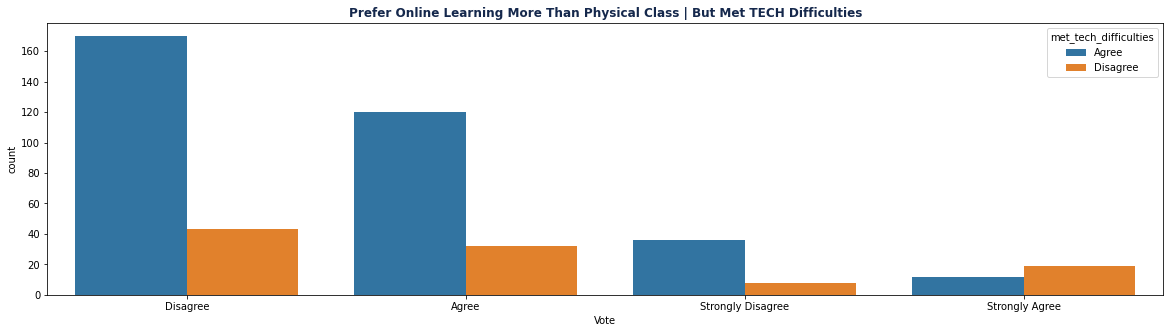

In [74]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x='online_physical_class', hue='met_tech_difficulties', data=met_tech_difficulties,
             order = met_tech_difficulties['online_physical_class'].value_counts().index)
plt.title('Prefer Online Learning More Than Physical Class | But Met TECH Difficulties', fontweight='bold', color='#15284C')
plt.xlabel("Vote")
#plt.ylabel('Nummber Of Sentiment')
plt.xticks(rotation='0')
plt.show()